In [2]:
import os
import sys
import graphviz as gv


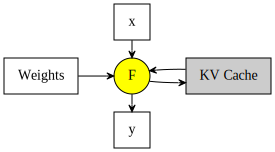

In [57]:
g = gv.Digraph()
g.graph_attr['rankdir'] = 'LR'
g.graph_attr['bgcolor'] = 'transparent'
g.node_attr['shape'] = 'oval'
g.edge_attr['arrowhead'] = 'vee'
g.edge_attr['arrowsize'] = '0.7'

with g.subgraph() as s:
  s.attr(rank='same')
  s.node(f'f', label="F", shape='circle', style='filled', fillcolor='yellow')
  s.node(f'x', label=f"x", shape='square')
  s.node(f'y', label=f"y", shape='square')

g.edge("x", "f")
g.edge("f", "y")
g.node(f'W', label=f"Weights", shape='box')
g.edge("W", "f")
g.node(f'KV-Cache', label="KV Cache", shape='box', style='filled', fillcolor='#cccccc')
g.edge("f", "KV-Cache")
g.edge("KV-Cache", "f")

g.render(outfile='graph.svg', format='svg')
g



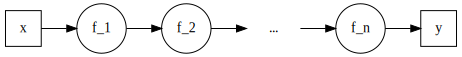

In [22]:
g = gv.Digraph()
g.graph_attr['rankdir'] = 'LR'
g.node_attr['shape'] = 'circle'

g.node('x', shape='square')
g.node('y', shape='square')
g.node('...', shape='none')
g.edge('x', 'f_1')
g.edge('f_1', 'f_2')
g.edge('f_2', '...')
g.edge('...', 'f_n')
g.edge('f_n', 'y')
g


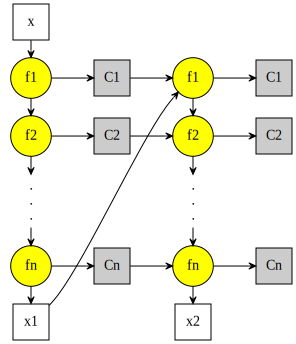

In [73]:
g = gv.Digraph()
g.graph_attr['rankdir'] = 'LR'
g.node_attr['shape'] = 'oval'
g.edge_attr['arrowhead'] = 'vee'
g.edge_attr['arrowsize'] = '0.7'
g.graph_attr['bgcolor'] = 'transparent'

COUNT = 2
SHOW_WEIGHTS = False
SHOW_CONTEXT = True
SHOW_LABELS = True
SHOW_BUBBLES = False

f_label = lambda x: (f"f{x}" if not SHOW_WEIGHTS else "f") if SHOW_LABELS else ""
C_label = lambda x: f"C{x}" if SHOW_LABELS else ""
C_margin = lambda x: f"{0.1*x}" if SHOW_BUBBLES else "0"

for i in range(COUNT):
  with g.subgraph() as s:
    s.attr(rank='same')
    s.node(f'f1_{i}', label=f_label(1), shape='circle', style='filled', fillcolor='yellow')
    s.node(f'f2_{i}', label=f_label(2), shape='circle', style='filled', fillcolor='yellow')
    s.node(f'fn_{i}', label=f_label("n"), shape='circle', style='filled', fillcolor='yellow')
    s.node(f'eps_{i}', label=".\n.\n.", shape='none')
    s.node(f'x_{i}', label=f"x{i+1}", shape='square')

    if i == 0:
      s.node('x', shape='square', label='x')

  if i == 0:
    g.edge(f"x", f"f1_{i}")

  if i != COUNT - 1:
    g.edge(f"x_{i}", f"f1_{i+1}")

  if SHOW_CONTEXT and i > 0:
    g.edge(f"C1_{i}", f"f1_{i}")
    g.edge(f"C2_{i}", f"f2_{i}")
    g.edge(f"Cn_{i}", f"fn_{i}")

  g.edge(f"f1_{i}", f"f2_{i}")
  g.edge(f"f2_{i}", f"eps_{i}")
  g.edge(f"eps_{i}", f"fn_{i}")
  g.edge(f"fn_{i}", f"x_{i}")

  if SHOW_WEIGHTS:
    g.edge(f"W1_{i}", f"f1_{i}")
    g.edge(f"W2_{i}", f"f2_{i}")
    g.edge(f"Wn_{i}", f"fn_{i}")

    g.node(f"W1_{i}", label='W1', shape='square')
    g.node(f"W2_{i}", label='W2', shape='square')
    g.node(f"Wn_{i}", label='Wn', shape='square')

  if SHOW_CONTEXT:
    g.edge(f"f1_{i}", f"C1_{i+1}")
    g.edge(f"f2_{i}", f"C2_{i+1}")
    g.edge(f"fn_{i}", f"Cn_{i+1}")

    if i > 0:
      g.node(f"C1_{i}", label=C_label(1), shape='square', style='filled', fillcolor='#cccccc', margin=C_margin(i))
      g.node(f"C2_{i}", label=C_label(2), shape='square', style='filled', fillcolor='#cccccc', margin=C_margin(i))
      g.node(f"Cn_{i}", label=C_label("n"), shape='square', style='filled', fillcolor='#cccccc', margin=C_margin(i))

    if i == COUNT - 1:
      g.node(f"C1_{i+1}", label=C_label(1), shape='square', style='filled', fillcolor='#cccccc', margin=C_margin(i+1))
      g.node(f"C2_{i+1}", label=C_label(2), shape='square', style='filled', fillcolor='#cccccc', margin=C_margin(i+1))
      g.node(f"Cn_{i+1}", label=C_label("n"), shape='square', style='filled', fillcolor='#cccccc', margin=C_margin(i+1))

g.render(outfile='graph.svg', format='svg')
g
